# Kaggle Datasets Scraper

In [1]:
import time
import kaggle
import pandas as pd
import tqdm
import pickle

kaggle.api.authenticate()

In [3]:
errors = pickle.load(open("../data/kaggle_errors.pkl", "rb"))

In [5]:
metadata = []
errors_2 = []
for user, e in tqdm.tqdm(errors):
    try:
        page = 1
        while True:
            results = kaggle.api.dataset_list(
                sort_by="hottest",
                file_type="csv",
                license_name="all",
                user=user,
                page=page,
            )
            if len(results) >= 1:
                metadata.extend(results)
            if len(results) < 10:
                break

            page += 1
            if page > 500:
                print(
                    f"User {user} has more than 10000 datasets. The API won't show all of them."
                )

            time.sleep(0.1)
    except kaggle.rest.ApiException as e:
        if e.reason == "Unauthorized":
            raise e
        else:
            errors_2.append((user, e))

  1%|          | 1/162 [00:00<02:02,  1.32it/s]

100%|██████████| 162/162 [02:23<00:00,  1.13it/s]


In [4]:
md = pickle.load(open("../data/kaggle_metadata.pkl", "rb"))

In [5]:
profiles = pd.DataFrame([profile.__dict__ for profile in md])

In [6]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138388 entries, 0 to 138387
Data columns (total 50 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subtitleNullable              138388 non-null  object        
 1   creatorNameNullable           138388 non-null  object        
 2   creatorUrlNullable            138388 non-null  object        
 3   totalBytesNullable            138388 non-null  int64         
 4   urlNullable                   138388 non-null  object        
 5   licenseNameNullable           138388 non-null  object        
 6   descriptionNullable           0 non-null       object        
 7   ownerNameNullable             138388 non-null  object        
 8   ownerRefNullable              138388 non-null  object        
 9   titleNullable                 138388 non-null  object        
 10  currentVersionNumberNullable  138388 non-null  int64         
 11  usabilityRati

<Axes: >

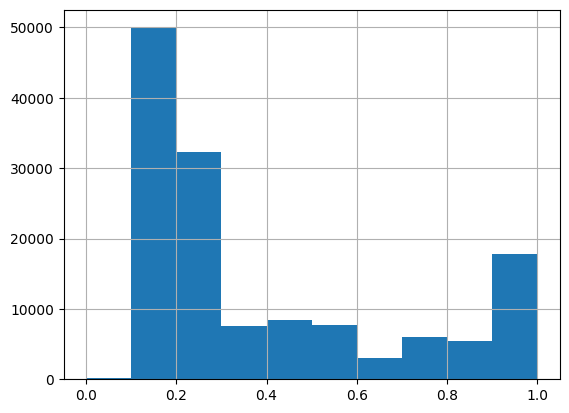

In [30]:
profiles.usabilityRating.hist()

In [41]:
profiles.sort_values("totalBytes", ascending=False).head(10)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions,size
23918,,Phil Culliton,philculliton,397703475831,https://www.kaggle.com/datasets/philculliton/h...,Unknown,None,Phil Culliton,philculliton,HPA 2020 16-Bit Training Set,...,11721,25,2,True,0.176471,True,[],[],[],370GB
32123,,Amin,amiiiney,107263381778,https://www.kaggle.com/datasets/amiiiney/dfl-v...,Unknown,None,Amin,amiiiney,DFL: Video frames 360x660,...,484,3,1,True,0.235294,True,[arts and entertainment],[],[],100GB
87100,,QwertyNice,dmitrygaus,107133985785,https://www.kaggle.com/datasets/dmitrygaus/gig...,Unknown,None,QwertyNice,dmitrygaus,GigaFlexhicle Dataset,...,2807,16,1,True,0.470588,True,"[automobiles and vehicles, computer vision, cl...",[],[],100GB
71665,,alexpls,alexpls,105008334554,https://www.kaggle.com/datasets/alexpls/herita...,Unknown,None,alexpls,alexpls,Heritage Recognition 2022 v2,...,755,1,1,True,0.117647,True,[],[],[],98GB
29448,,XingJian Lyu,roguekk007,103635633809,https://www.kaggle.com/datasets/roguekk007/gld...,CC0: Public Domain,None,XingJian Lyu,roguekk007,GLDv2TFRecords,...,89,1,1,True,0.250000,True,[],[],[],97GB
55623,,Nikita Glazunov,nikitaglazunov,102003538871,https://www.kaggle.com/datasets/nikitaglazunov...,Unknown,None,Nikita Glazunov,nikitaglazunov,mayo_images_part1,...,210,0,1,True,0.176471,True,[],[],[],95GB
6103,,WillArevalo,willarevalo,96875952309,https://www.kaggle.com/datasets/willarevalo/re...,Unknown,None,WillArevalo,willarevalo,retinopathy_btgraham300,...,1499,3,1,True,0.187500,True,[],[],[],90GB
50543,512x512 with overlap of 256x256,Yuri Dias Meira,ydmeira,96462261060,https://www.kaggle.com/datasets/ydmeira/hubmap...,CC BY-SA 4.0,None,Yuri Dias Meira,ydmeira,TFRecords for HuBMAP Dataset,...,912,0,1,True,0.352941,True,[],[],[],90GB
67839,,bastien nes,bastiennes,94299962133,https://www.kaggle.com/datasets/bastiennes/dat...,Unknown,None,bastien nes,bastiennes,dataset,...,348,1,3,True,0.125000,True,[],[],[],88GB
54096,The first-ever generative modeling dataset for...,Ching-Yuan Bai,andrewcybai,93845035418,https://www.kaggle.com/datasets/andrewcybai/ge...,CC BY-SA 4.0,None,Ching-Yuan Bai,andrewcybai,Generative Dog Images,...,1863,3,1,True,0.941176,True,"[arts and entertainment, earth and nature]",[],[],87GB


In [7]:
profiles["totalBytesGB"] = profiles.totalBytes / 1024**3

In [9]:
profiles.to_csv("../data/kaggle_metadata.csv", index=False)

In [45]:
profiles["size"].unique()

array(['5MB', '141MB', '554MB', ..., '282B', '154B', '899B'], dtype=object)

In [8]:
profiles.totalBytesGB.describe()

count    138388.000000
mean          0.530633
std           3.254596
min           0.000000
25%           0.000020
50%           0.000474
75%           0.020903
max         370.390225
Name: totalBytesGB, dtype: float64

In [58]:
profiles[profiles.totalBytesGB <= 10000].totalBytesGB.sum()

73433.20037208498

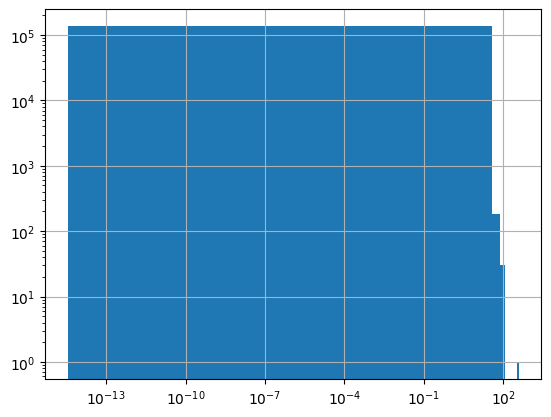

In [49]:
ax = profiles.totalBytesGB.hist()
ax.set_xscale("log")
ax.set_yscale("log")

In [26]:
md[0].__dict__

{'subtitleNullable': 'Explore global research practices and opinions on scholarly communication',
 'creatorNameNullable': 'Timo Bozsolik',
 'creatorUrlNullable': 'timoboz',
 'totalBytesNullable': 4828860,
 'urlNullable': 'https://www.kaggle.com/datasets/bmkramer/101-innovations-research-tools-survey',
 'licenseNameNullable': 'CC0: Public Domain',
 'descriptionNullable': None,
 'ownerNameNullable': 'Bianca Kramer',
 'ownerRefNullable': 'bmkramer',
 'titleNullable': '101 Innovations - Research Tools Survey',
 'currentVersionNumberNullable': 2,
 'usabilityRatingNullable': 0.7647059,
 'id': 39,
 'ref': 'bmkramer/101-innovations-research-tools-survey',
 'subtitle': 'Explore global research practices and opinions on scholarly communication',
 'hasSubtitle': True,
 'creatorName': 'Timo Bozsolik',
 'hasCreatorName': True,
 'creatorUrl': 'timoboz',
 'hasCreatorUrl': True,
 'totalBytes': 4828860,
 'hasTotalBytes': True,
 'url': 'https://www.kaggle.com/datasets/bmkramer/101-innovations-research-t

In [18]:
with open("../data/kaggle_metadata.pkl", "wb") as f:
    pickle.dump(md, f)

## List of all Kaggle Datasets

Download the tables `Datasets`, `DatasetVersions`, and `Users` from the [Meta Kaggle](https://www.kaggle.com/datasets/kaggle/meta-kaggle) dataset.

In [34]:
username_slug = pd.read_csv(
    "../data/Datasets.csv",
    dtype={"CurrentDatasetVersionId": "Int64", "OwnerUserId": "Int64"},
)
username_slug = username_slug[
    ["Id", "CreatorUserId", "OwnerUserId", "CurrentDatasetVersionId"]
]
username_slug = username_slug.rename(columns={"Id": "DatasetId"})
username_slug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312769 entries, 0 to 312768
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   DatasetId                312769 non-null  int64
 1   CreatorUserId            312769 non-null  int64
 2   OwnerUserId              310449 non-null  Int64
 3   CurrentDatasetVersionId  312664 non-null  Int64
dtypes: Int64(2), int64(2)
memory usage: 10.1 MB


In [38]:
dataset_versions = pd.read_csv("../data/DatasetVersions.csv")
dataset_versions = dataset_versions[["Id", "CreatorUserId", "VersionNumber", "Slug"]]
dataset_versions = dataset_versions.rename(columns={"Id": "DatasetVersionId"})
dataset_versions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054141 entries, 0 to 1054140
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   DatasetVersionId  1054141 non-null  int64  
 1   CreatorUserId     1054141 non-null  int64  
 2   VersionNumber     980122 non-null   float64
 3   Slug              1054141 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 32.2+ MB


In [52]:
users = pd.read_csv("../data/Users.csv")
users = users[["Id", "UserName"]]
users = users.rename(columns={"Id": "UserId"})
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17553389 entries, 0 to 17553388
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   UserId    int64 
 1   UserName  object
dtypes: int64(1), object(1)
memory usage: 267.8+ MB


In [55]:
merged = username_slug.merge(
    dataset_versions,
    how="left",
    left_on=["CurrentDatasetVersionId"],
    right_on=["DatasetVersionId"],
).merge(
    users,
    how="left",
    left_on="OwnerUserId",
    right_on="UserId",
)
merged.dropna(subset=["UserName", "Slug"], inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301969 entries, 4 to 312768
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DatasetId                301969 non-null  int64  
 1   CreatorUserId_x          301969 non-null  int64  
 2   OwnerUserId              301969 non-null  Int64  
 3   CurrentDatasetVersionId  301969 non-null  Int64  
 4   DatasetVersionId         301969 non-null  float64
 5   CreatorUserId_y          301969 non-null  float64
 6   VersionNumber            301783 non-null  float64
 7   Slug                     301969 non-null  object 
 8   UserId                   301969 non-null  float64
 9   UserName                 301969 non-null  object 
dtypes: Int64(2), float64(4), int64(2), object(2)
memory usage: 25.9+ MB


In [56]:
merged[["UserName", "Slug"]].to_csv("../data/username_slug.csv", index=False)

## Gather dataset metadata

In [57]:
username_slug = pd.read_csv("../data/username_slug.csv")

In [ ]:
metadata = []
errors = []
for user in tqdm.tqdm(username_slug["UserName"].unique()):
    try:
        page = 1
        while True:
            results = kaggle.api.dataset_list(
                sort_by="hottest",
                file_type="csv",
                license_name="all",
                user=user,
                page=page,
            )
            if results:
                metadata.extend(results)
            if len(results) < 10:
                break

            page += 1
            if page > 500:
                print(
                    f"User {user} has more than 10000 datasets. The API won't show all of them."
                )

            time.sleep(0.01)
    except Exception as e:
        errors.append((user, e))

with open("../data/metadata.pkl", "wb") as file:
    pickle.dump(metadata, file)

## Kaggle API

In [ ]:
kaggle.api.dataset_list()
kaggle.api.dataset_list_files()
kaggle.api.dataset_download_files()
kaggle.api.dataset_metadata()
kaggle.api.dataset_status()